<a href="https://colab.research.google.com/github/mallibus/DSS-NLP-challenge/blob/master/DSS_NLP_Challenge_Recurrent_Neural_Network_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DSS7-NPL Challenge](http://www.datascienceseed.com/wp-content/uploads/2019/07/DSS-CHALLENGE-300x169.jpg)



## Step 1: Installing the dependencies and setting up a GPU environment

In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 102kB/s 
     |████████████████████████████████| 3.0MB 38.6MB/s 
     |████████████████████████████████| 419kB 50.9MB/s 


## Step 2: Importing the libraries

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [4]:
tf.__version__

'2.0.0-alpha0'

In [0]:
# Function for plotting learning history

from matplotlib import pyplot as plt
%matplotlib inline

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Connection with my local Google Drive

I tried to use the sharable link to make this more general, but I got errors with big dataset, so ... for now this is how it is

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Dataset Path will be used for models saving as well

dataset_path = "/content/drive/My Drive/AIML/Projects/DSS-NLP-challenge/dataset/wiki/"
dataset_name = "dss_wiki_02000_20K1"
dataset_file = dataset_name+".json"

import urllib.request

url_wiki = 'https://drive.google.com/file/d/1HZxMVthzG-tboMXO0qsPkeH2Cuq1YCbi/view?usp=sharing' # 2000

url_wiki = 'https://drive.google.com/uc?export=download&id=1iteaiSPd1OLJdKZitcv76LzrD_mAC8S8'# 5

url_wiki = 'https://drive.google.com/uc?export=download&id=15hhpN2EszdRx7-PN43yGFsoFPuZzwFO1'   # 200

f = urllib.request.urlopen(url_wiki)



## Step 3: Data Preprocessing

### Load the data

In [0]:
import json

with open(dataset_path+dataset_file, 'r') as f:
  dss = json.load(f)

print(f"Dataset of {len(dss['X'])} texts of {len(set(dss['y']))} classes - vocabulary of {len(dss['word_index'])} words")
print(dss['categories'])

In [0]:
dss.keys()

### Setting up the dataset parameters

In [0]:
number_of_words = len(dss['word_index'])
max_len = 500

In [0]:
import numpy as np

In [0]:
X_arr = np.array(dss['X'])
y_arr = np.array(dss['y'])
ylabels = dss['categories']


In [14]:
split = 0.2

dataset_size = len(y_arr)
test_size    = int(dataset_size * split)
train_size   = dataset_size - test_size
test_indexes  = np.random.choice(range(dataset_size),test_size,replace=False)
train_indexes =  np.array(list(set(range(dataset_size)) - set(test_indexes)))
np.random.shuffle(train_indexes)
dataset_size,len(train_indexes),len(test_indexes)            

(8977, 7182, 1795)

In [0]:
(X_train, y_train), (X_test, y_test) = (X_arr[train_indexes],y_arr[train_indexes]),(X_arr[test_indexes],y_arr[test_indexes])

### Explore some articles


In [0]:
id_to_word = {dss['word_index'][key]:key for key in dss['word_index'].keys()}

In [20]:
id_to_word[1]

'xxxunk'

In [0]:
import textwrap
size = 3
sample = np.random.choice(range(len(X_train)),size,replace=False)
for i in sample:
    print(f'Text #{i}:{ylabels[y_train[i]]}')
    s = ' '.join(id_to_word[id] for id in X_train[i])
    print('\n'.join(textwrap.wrap(s, width=120, replace_whitespace=False)))
    print()



### Padding all sequences to be the same length 

In [0]:
# Changing variable name to preserve orginal dataset
X_train_p = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len,padding='post', truncating='post')
X_train_p = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)


In [0]:
# Changing variable name to preserve orginal dataset
X_test_p = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len,padding='post', truncating='post')
X_test_p = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

## Step 4: Building a Recurrent Neural Network

### Defining the model

In [0]:
model = tf.keras.Sequential()

### Adding the embedding layer

In [0]:
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          27245056  
Total params: 27,245,056
Trainable params: 27,245,056
Non-trainable params: 0
_________________________________________________________________


### Adding the LSTM layer

- units: 128
- activation: tanh

In [48]:
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

W0721 15:47:47.290005 140677731428224 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff16c380278>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


### Adding the output layer

- units: 1
- activation: sigmoid

In [0]:
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))

### Compiling the model

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [70]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 128)          27245056  
_________________________________________________________________
unified_lstm_11 (UnifiedLSTM (None, 128)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 774       
Total params: 27,377,414
Trainable params: 27,377,414
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [54]:
model.fit(X_train_p, y_train, epochs=5, batch_size=16,validation_split=0.1)

Train on 5745 samples, validate on 1437 samples
Epoch 1/5
5745/5745 [==============================] - 14s 2ms/sample - loss: 0.5600 - sparse_categorical_accuracy: 0.8176 - val_loss: 1.2281 - val_sparse_categorical_accuracy: 0.5992
Epoch 2/5
5745/5745 [==============================] - 14s 2ms/sample - loss: 0.3160 - sparse_categorical_accuracy: 0.9046 - val_loss: 1.2276 - val_sparse_categorical_accuracy: 0.6388
Epoch 3/5
5745/5745 [==============================] - 14s 2ms/sample - loss: 0.1499 - sparse_categorical_accuracy: 0.9589 - val_loss: 1.2916 - val_sparse_categorical_accuracy: 0.6395
Epoch 4/5
5745/5745 [==============================] - 14s 2ms/sample - loss: 0.0995 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.3711 - val_sparse_categorical_accuracy: 0.6646
Epoch 5/5
5745/5745 [==============================] - 14s 2ms/sample - loss: 0.0737 - sparse_categorical_accuracy: 0.9788 - val_loss: 1.4102 - val_sparse_categorical_accuracy: 0.6632


### Evaluating the model

In [55]:
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

1795/1795 [==============================] - 1s 411us/sample - loss: 1.3912 - sparse_categorical_accuracy: 0.6680


## Step 5: Evaluate other architrectures

Inspiration for various architectures comes from [here](https://realpython.com/python-keras-text-classification/#convolutional-neural-networks-cnn)



###  LSTM Baseline

In [0]:
model_name = "_lstm"

W0721 16:09:24.124069 140677731428224 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff0a6d9c390>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


Train on 6463 samples, validate on 719 samples
Epoch 1/5
6463/6463 [==============================] - 3s 481us/sample - loss: 1.7021 - sparse_categorical_accuracy: 0.2722 - val_loss: 1.5524 - val_sparse_categorical_accuracy: 0.3866
Epoch 2/5
6463/6463 [==============================] - 3s 421us/sample - loss: 1.2820 - sparse_categorical_accuracy: 0.4810 - val_loss: 1.1481 - val_sparse_categorical_accuracy: 0.5327
Epoch 3/5
6463/6463 [==============================] - 3s 418us/sample - loss: 0.7489 - sparse_categorical_accuracy: 0.7472 - val_loss: 0.9774 - val_sparse_categorical_accuracy: 0.6467
Epoch 4/5
6463/6463 [==============================] - 3s 424us/sample - loss: 0.4262 - sparse_categorical_accuracy: 0.8717 - val_loss: 0.9912 - val_sparse_categorical_accuracy: 0.6745
Epoch 5/5
6463/6463 [==============================] - 3s 421us/sample - loss: 0.2695 - sparse_categorical_accuracy: 0.9248 - val_loss: 1.0104 - val_sparse_categorical_accuracy: 0.6968


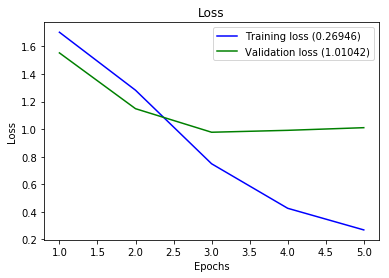

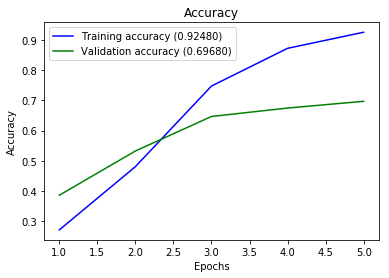

1795/1795 [==============================] - 1s 328us/sample - loss: 1.0176 - sparse_categorical_accuracy: 0.6947
Test accuracy: 0.6947075128555298


In [69]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = model.fit(X_train_p, y_train, epochs=5, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

### Global max pooling after Embedding layer

In [0]:
model_name = "_globmaxp"

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 500, 128)          27245056  
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 774       
Total params: 27,245,830
Trainable params: 27,245,830
Non-trainable params: 0
_________________________________________________________________
Train on 6463 samples, validate on 719 samples
Epoch 1/10
6463/6463 [==============================] - 1s 192us/sample - loss: 1.7674 - sparse_categorical_accuracy: 0.2409 - val_loss: 1.7283 - val_sparse_categorical_accuracy: 0.2990
Epoch 2/10
6463/6463 [==============================] - 1s 161us/sample - loss: 1.6695 - sparse_categorical_accuracy: 0.3963 - val_loss: 1

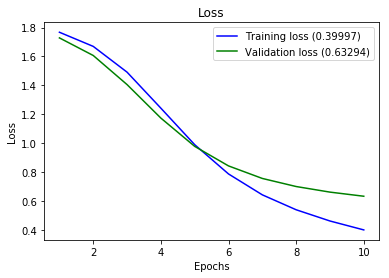

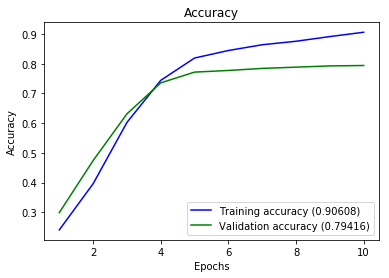

1795/1795 [==============================] - 0s 69us/sample - loss: 0.6242 - sparse_categorical_accuracy: 0.8050
Test accuracy: 0.8050139546394348


In [84]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.GlobalMaxPooling1D())
#model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()
history = model.fit(X_train_p, y_train, epochs=10, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

### 1D Convolution + MaxPooling + Flattening

In [0]:
model_name = "_1dconv_axp_flat"

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 500, 128)          27245056  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 496, 128)          82048     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 124, 128)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 15872)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 95238     
Total params: 27,422,342
Trainable params: 27,422,342
Non-trainable params: 0
_________________________________________________________________
Train on 6463 samples, validate on 719 samples
Epoch 1/10
6463/6463 [==============================] - 2s 2

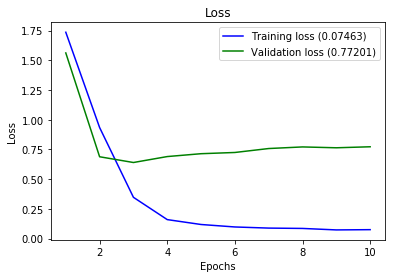

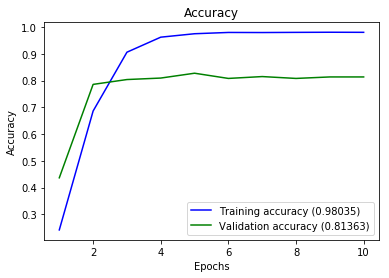

1795/1795 [==============================] - 0s 96us/sample - loss: 0.8123 - sparse_categorical_accuracy: 0.7994
Test accuracy: 0.7994428873062134


In [101]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()
history = model.fit(X_train_p, y_train, epochs=10, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))


### MaxPooling (local) + Flattening

In [0]:
model_name = "_maxp_flat"

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 500, 128)          27245056  
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 62, 128)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 7936)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 47622     
Total params: 27,292,678
Trainable params: 27,292,678
Non-trainable params: 0
_________________________________________________________________
Train on 6463 samples, validate on 719 samples
Epoch 1/10
6463/6463 [==============================] - 1s 190us/sample - loss: 1.7616 - sparse_categorical_accuracy: 0.2210 - val_loss: 1.7320 - val_sparse_categorical_accuracy: 0.2378
Epoch 

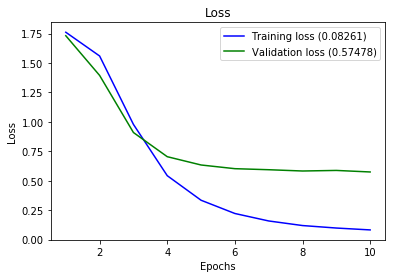

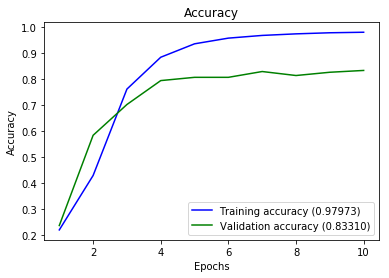

1795/1795 [==============================] - 0s 70us/sample - loss: 0.6078 - sparse_categorical_accuracy: 0.8262
Test accuracy: 0.8261838555335999


In [104]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()
history = model.fit(X_train_p, y_train, epochs=10, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))



In [105]:
import textwrap

size = 3
sample = np.random.choice(range(len(X_test)),size)
predictions = model.predict_classes(X_test_p[sample])
for idx,i in enumerate(sample):
    print(f'Review #{i} - P:{ylabels[predictions[idx]]},A:{ylabels[y_test[sample[idx]]]}')
    s = ' '.join(id_to_word[id] for id in X_test[i])
    print('\n'.join(textwrap.wrap(s, width=120, replace_whitespace=False)))
    print()

Review #105 - P:Health,A:Health
protein digestibility refers to how well a given protein is digested along with the amino acid score protein
digestibility determines the values for pdcaas and xxxunk references

Review #1454 - P:Health,A:Health
effective safety training is an unofficial phrase used to describe the training materials designed to teach occupational
safety and health standards developed by the united states government labor organization occupational safety and health
administration osha osha has produced many standards and regulations that affect employers and employees in the united
states united states employers have a legal responsibility to educate employees on all workplace safety standards and
the hazards that their employees may face while on the job and providing effective safety training meets that
responsibility as enterprises employers must have an overall safety program including relative site specific safety
information where applicable the safety training pro

## Save the model

In [0]:


model_file = dataset_path+dataset_name+model_name+'.h5'
model.save(model_file)